In [120]:
import os, json
import pandas as pd
import numpy as np

In [121]:
path_to_json = '/Users/arun/Dropbox/thelayoff/company_jsons' 
raw_data_dir = os.path.join(path_to_json)
files = os.listdir(raw_data_dir)
#files[0]

In [122]:
df = pd.DataFrame()

def process_file(d, files):
    total_dict = {"Name:": [], "Industry/Area of Activity:": [], "Company Stock Ticker:": [], "Stock traded at:": [],"Industry Code:":[], "url": []}
    
    for i in range(len(files)):
        filepath = os.path.join(d, files[i])
        with open(filepath, encoding="utf-8") as json_file:
            try:
                data = json.load(json_file) #company data into dict
            except:
                print(files[i])
            
            list_of_cols = ["Industry/Area of Activity:","Company Stock Ticker:", "Stock traded at:","Industry Code:","url"]
            
            
            for element in list_of_cols:
                if(element in data.keys()):
                    total_dict[element].extend(data[element])
                else:
                    total_dict[element].extend(["N/A"])
            
            total_dict["Name:"].extend([files[i][:-5]])
            
                    
    return (total_dict)

data = process_file(path_to_json, files)
#print(data)

.DS_Store


In [123]:
df = pd.DataFrame.from_dict(data)
#df.head()

In [124]:
df["Industry/Area of Activity:"].value_counts()

Local and State Government, education and hospitals ||| School Districts    12544
Health-Care Providers // Acute Care Hospitals                                3366
County government employeer.                                                 3075
Higher education, colleges and universities.                                 1670
Health-Care Providers // Critical Access Hospitals                           1336
                                                                            ...  
Companies on the Energy Service//Water Utilities                                1
Retailers: Broad Line & Apparel; Department Stores                              1
Banks / Financial Services                                                      1
Industrials // Industrials, Industrial Suppliers                                1
Autos & Auto Par                                                                1
Name: Industry/Area of Activity:, Length: 475, dtype: int64

In [125]:
df["Stock traded at:"].value_counts()

N/A                        18218
Not applicable             10549
NASDAQ                      3753
NYSE                        2760
Toronto Stock Exchange       995
                           ...  
Copenhagen                     1
Sarajevo Stock Exchange        1
OSE                            1
STO                            1
NYSE American                  1
Name: Stock traded at:, Length: 73, dtype: int64

In [126]:
df["Company Stock Ticker:"].value_counts()

N/A     29863
BNS         3
WB          3
AM          3
PTI         3
        ...  
BIOS        1
VALU        1
FISV        1
CNO         1
SMI         1
Name: Company Stock Ticker:, Length: 7293, dtype: int64

Local and State Government, education and hospitals ||| School Districts    12544
Health-Care Providers // Acute Care Hospitals                                3366
County government employeer.                                                 3075
Higher education, colleges and universities.                                 1670
Health-Care Providers // Critical Access Hospitals                           1336
N/A                                                                          1135
Local and State Government, excluding education and hospitals                 984
Information Technology Services                                               543
Banks                                                                         507
Management and Business Services                                              496
Contracting, Building and Construction                                        396
Good production, manufacturing                                                331
Advertising, Mar

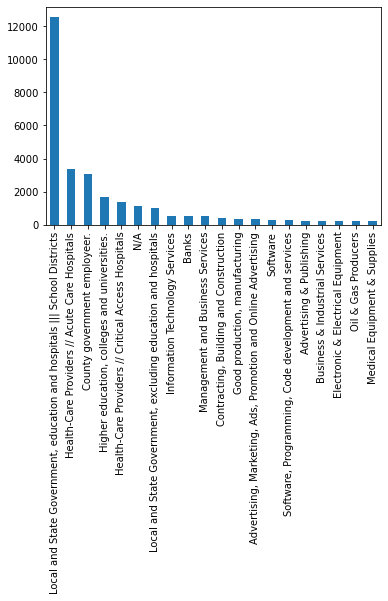

In [127]:
temp = df["Industry/Area of Activity:"].value_counts()
temp = temp.head(20)
temp.plot(kind = "bar")
temp

N/A                       18218
Not applicable            10549
NASDAQ                     3753
NYSE                       2760
Toronto Stock Exchange      995
AMEX                        519
NCM                         487
XNYS                         33
XNAS                         13
LSE                          10
TYO                           9
Euronext                      8
FWB                           6
n/a                           5
Private Company               5
LON                           4
NYSE AMERICAN                 4
TBD                           4
BIT                           3
Not Applicable                3
Name: Stock traded at:, dtype: int64

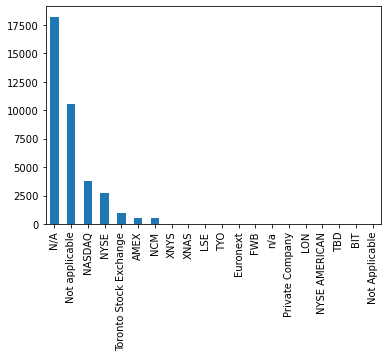

In [128]:
temp = df["Stock traded at:"].value_counts()
temp = temp.head(20)
temp.plot(kind = "bar")
temp

In [129]:
df["Industry Code:"].value_counts()

N/A                                                              12724
z981198                                                          12544
z4532                                                             4801
611310                                                            1158
8355                                                               507
                                                                 ...  
Local and State Government, excluding education and hospitals        1
8422                                                                 1
9866                                                                 1
1751                                                                 1
8726                                                                 1
Name: Industry Code:, Length: 160, dtype: int64

In [130]:
#check for N/A cleanup & add industry codes
#upload dataframe to dropbox


#distribution of industries across posts -> check which are traded where

#run a descriptive notebook with data from companies with top posts
#count number of companies in each industry with 10 or more posts & 100 or more words & stock ticker
    #check which ones are traded on what the stock exchange


In [12]:
df.to_csv('/Users/arun/Dropbox/thelayoff/company_posts.csv' )

In [131]:
#post_data = pd.read_csv('/Users/arun/Dropbox/thelayoff/all_posts.txt', delimiter = "\t")
#post_data.head()

In [132]:
post_path_to_json = '/Users/arun/Dropbox/thelayoff/post_jsons' 
post_raw_data_dir = os.path.join(post_path_to_json)
post_files = os.listdir(post_raw_data_dir)
#print(post_files)

#pipeline post data

In [133]:
post_df = pd.DataFrame()

def post_process_file(d, files):
    total_dict = {"company": []}
    
    for i in range(len(files)):
        filepath = os.path.join(d, files[i])
        with open(filepath, encoding="utf-8") as json_file:
            try:
                data = json.load(json_file) #post data into dict
            except:
                print(files[i])
            
            list_of_cols = ["company"]
            
            
            for element in list_of_cols:
                if(element in data.keys()):
                    total_dict[element].extend(data[element])
                else:
                    total_dict[element].extend(["N/A"])
                              
    return (total_dict)

post_data = post_process_file(post_path_to_json, post_files)
post_df = pd.DataFrame.from_dict(post_data)
post_df.head()


#put post data into dataframe just looking at how many times a company was mentioned

all_posts.txt


,company
0,https://www.thelayoff.com/symantec
1,https://www.thelayoff.com/at-and-t
2,https://www.thelayoff.com/intel
3,https://www.thelayoff.com/bank-of-america
4,https://www.thelayoff.com/international-busine...


In [134]:
post_counts = post_df["company"].value_counts()
post_counts.head(30)

#company post frequency check

https://www.thelayoff.com/corinthian-colleges                9206
https://www.thelayoff.com/at-and-t                           8714
https://www.thelayoff.com/qualcomm                           8602
https://www.thelayoff.com/intel                              7676
https://www.thelayoff.com/university-phoenix                 6649
https://www.thelayoff.com/verizon-communications             5846
https://www.thelayoff.com/baker-hughes                       4992
https://www.thelayoff.com/chesapeake-energy                  4976
https://www.thelayoff.com/sears-holdings                     4638
https://www.thelayoff.com/sams-club                          4231
https://www.thelayoff.com/oracle                             3912
https://www.thelayoff.com/chevron                            3432
https://www.thelayoff.com/honeywell-international            3250
https://www.thelayoff.com/follett                            3218
https://www.thelayoff.com/international-business-machines    3197
https://ww

In [135]:
#type(post_counts.keys()[0])
count = 0
post_clean = pd.DataFrame()
tempKeys = []
temp = []
for i in range(len(post_counts)):
    if(post_counts[i]>10):
        count=count+1
        tempKeys.append(post_counts.keys()[i])
        temp.append(post_counts[i])
        #print(post_counts.keys()[i])
        
post_clean["Companies"] = tempKeys
post_clean["Post Count"] = temp
print(post_clean.head())

#companies with 10 or more posts check

                                       Companies  Post Count
0  https://www.thelayoff.com/corinthian-colleges        9206
1             https://www.thelayoff.com/at-and-t        8714
2             https://www.thelayoff.com/qualcomm        8602
3                https://www.thelayoff.com/intel        7676
4   https://www.thelayoff.com/university-phoenix        6649


In [136]:
ticker = []
exchange = []
industry = []

for i in range(len(post_clean)):
    c = post_clean.iloc[i]["Companies"]
    ticker.append(df.loc[df["url"] == c]["Company Stock Ticker:"].to_string(index=False))
    exchange.append(df.loc[df["url"] == c]["Stock traded at:"].to_string(index=False))
    industry.append(df.loc[df["url"] == c]["Industry/Area of Activity:"].to_string(index=False))
    
post_clean["Company Stock Ticker:"] = ticker
post_clean["Stock traded at:"] = exchange
post_clean["Industry/Area of Activity:"] = industry
post_clean.head(20)

#add stock ticker/exchange/industry to cleaned dataframe

,Companies,Post Count,Company Stock Ticker:,Stock traded at:,Industry/Area of Activity:
0,https://www.thelayoff.com/corinthian-colleges,9206,COCO,NASDAQ,Specialty Retailers & Services
1,https://www.thelayoff.com/at-and-t,8714,T,NYSE,Telecommunications: Fixed Line and Wireless
2,https://www.thelayoff.com/qualcomm,8602,QCOM,NASDAQ,Telecommunications Equipment
3,https://www.thelayoff.com/intel,7676,INTC,XNAS,Semiconductors
4,https://www.thelayoff.com/university-phoenix,6649,N/A,Not applicable,"Higher education, colleges and universities."
5,https://www.thelayoff.com/verizon-communications,5846,VZ,NYSE,Telecommunications
6,https://www.thelayoff.com/baker-hughes,4992,BHGE,NYSE,"Oil Equipment, Services & Distribution"
7,https://www.thelayoff.com/chesapeake-energy,4976,CHK,NYSE,Oil & Gas Producers
8,https://www.thelayoff.com/sears-holdings,4638,SHLD,NASDAQ,Retailers: Broad Line & Apparel
9,https://www.thelayoff.com/sams-club,4231,N/A,N/A,Retailers: Broad Line & Apparel


In [137]:
post_clean.to_csv('/Users/arun/Dropbox/thelayoff/post_clean.csv')